| Bilgi | İçerik |
|-------|--------|
| **Ad** | Amir |
| **Soyad** | Elahmed |
| **Okul Numara** | 2112721307 |
| **GitHub Repo** | https://github.com/Amirelahmed/CNN_siniflandirma |
| **Model2** | Temel CNN (Sıfırdan Oluşturulmuş Evrişimli Sinir Ağı) |
| **Amaç** | Transfer learning olmadan, sıfırdan oluşturulan bir CNN mimarisinin performansını değerlendirmek |
| **Kullanılan Katmanlar** | Conv2D, MaxPooling2D, Flatten, Dense, Dropout |
| **Eğitim Doğruluğu** | %98 civarı |
| **Doğrulama Doğruluğu** | %93 |
| **Test Doğruluğu** | %93.33 |
| **Sonuç** | Model iki sınıfı (saat ve fare) yüksek doğrulukla ayırt edebilmektedir |



Bu çalışmada, tarafımdan çekilen görüntülerden oluşan iki sınıflı bir veri seti (saat ve fare) kullanılarak temel bir CNN modeli geliştirilmiştir. Amaç, görüntülerin hangi sınıfa ait olduğunu derin öğrenme yöntemleriyle otomatik olarak ayırt edebilen bir sınıflandırma sistemi oluşturmaktır.

Kullanılan Algoritma
Bu modelde, sıfırdan oluşturulmuş Temel CNN (Convolutional Neural Network) mimarisi kullanılmıştır. Model; Conv2D, MaxPooling2D, Flatten, Dense ve Dropout katmanlarından oluşmakta olup iki sınıf için softmax çıkışı üretmektedir.

Elde Edilen Sonuçlar

Model, eğitim sonunda yüksek performans göstermiştir:

Eğitim doğruluğu: %98 civarı

Doğrulama doğruluğu: %93

Test doğruluğu: %93.33

Bu sonuçlar, modelin iki sınıfı başarıyla ayırt edebildiğini göstermektedir.

Google Drive'ı bağlıyoruz

In [14]:
# Google Drive'ı Colab ortamına bağlıyoruz
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ZIP dosyasının Drive içindeki yolunu belirliyoruz

In [15]:
# Google Drive içindeki dataset ZIP dosyasının tam yolu
zip_path = "/content/drive/MyDrive/dataset-odev1.zip"

# ZIP'in açılacağı klasör
extract_path = "/content/dataset-odev1"


ZIP dosyasını açıyoruz

In [16]:
# Gerekli modülleri içe aktarıyoruz
import os, zipfile

# Klasör yoksa oluşturuyoruz
os.makedirs(extract_path, exist_ok=True)

# ZIP dosyasını açıyoruz
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# ZIP açıldı mı, içeriğini kontrol ediyoruz
print("Ana klasör içeriği:", os.listdir(extract_path))


Ana klasör içeriği: ['dataset-odev1']


Dataset'in gerçek yolunu ayarlıyoruz

In [17]:
# ZIP içinde bir klasör daha olduğundan gerçek dataset yolu şöyle:
base_dir = "/content/dataset-odev1/dataset-odev1"

# İçeriği kontrol ediyoruz
print("Dataset klasörü:", os.listdir(base_dir))


Dataset klasörü: ['fare', 'saat']


2 — DATASET HAZIRLIĞI (ImageDataGenerator)

Resim boyutunu ve batch size değerini ayarlıyoruz

In [18]:
# Resimlerin yeniden boyutlandırılacağı boyutlar
img_height = 128
img_width = 128

# Bir batch'te kaç resim işlenecek
batch_size = 32


ImageDataGenerator ile train/validation ayırıyoruz

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Resimleri normalize ediyoruz (0–1 aralığı)
# %20 doğrulama seti ayırıyoruz
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


Eğitim verisini yüklüyoruz

In [20]:
train_generator = train_datagen.flow_from_directory(
    base_dir,                        # Dataset klasörü
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",        # 2 sınıf olduğu için categorical
    subset="training",               # %80 eğitim verisi
    shuffle=True
)


Found 120 images belonging to 2 classes.


Doğrulama (validation) verisini yüklüyoruz

In [21]:
val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",             # %20 doğrulama verisi
    shuffle=False
)


Found 30 images belonging to 2 classes.


Sınıf isimlerini kontrol ediyoruz

In [22]:
print("Sınıf İndeksleri:", train_generator.class_indices)


Sınıf İndeksleri: {'fare': 0, 'saat': 1}


3 — CNN MODELİNİ OLUŞTURUYORUZ

CNN modelini sıfırdan oluşturuyoruz

In [23]:
from tensorflow.keras import layers, models, optimizers

# Yeni bir Sequential model oluşturuyoruz
model2 = models.Sequential()

# 1. Conv2D + MaxPooling
model2.add(layers.Conv2D(32, (3,3), activation="relu",
                         input_shape=(img_height, img_width, 3)))
model2.add(layers.MaxPooling2D((2,2)))

# 2. Conv2D + MaxPooling
model2.add(layers.Conv2D(64, (3,3), activation="relu"))
model2.add(layers.MaxPooling2D((2,2)))

# 3. Conv2D + MaxPooling
model2.add(layers.Conv2D(128, (3,3), activation="relu"))
model2.add(layers.MaxPooling2D((2,2)))

# Düzleştirme katmanı
model2.add(layers.Flatten())

# Tam bağlı Dense katmanı
model2.add(layers.Dense(128, activation="relu"))

# Overfitting'i azaltmak için Dropout katmanı
model2.add(layers.Dropout(0.5))

# Çıkış katmanı (2 sınıf için softmax)
model2.add(layers.Dense(2, activation="softmax"))


Modeli derliyoruz (compile)

In [24]:
model2.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Modelin yapısını ekrana yazdırıyoruz
model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

4 — MODELİ EĞİTİYORUZ

Kaç epoch eğitim yapılacağını belirliyoruz

In [25]:
epochs = 15


Modeli eğitiyoruz

In [26]:
history2 = model2.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5392 - loss: 0.8590 - val_accuracy: 0.5000 - val_loss: 0.6807
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5579 - loss: 0.6682 - val_accuracy: 0.6333 - val_loss: 0.6229
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8692 - loss: 0.5270 - val_accuracy: 0.8667 - val_loss: 0.4547
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9160 - loss: 0.3245 - val_accuracy: 0.7000 - val_loss: 0.7240
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7918 - loss: 0.5224 - val_accuracy: 0.7667 - val_loss: 0.3780
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9224 - loss: 0.2147 - val_accuracy: 0.9333 - val_loss: 0.2136
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9471 - loss: 0.2092 - val_accuracy: 0.9667 - val_loss: 0.1806
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9615 - loss: 0.1387 - val_accuracy: 0.9333 - val_loss: 0.1654
Epoch 9/15
4/4

5 — EĞİTİM SONUÇLARINI GÖRSELLEŞTİRİYORUZ

Accuracy grafiğini çiziyoruz

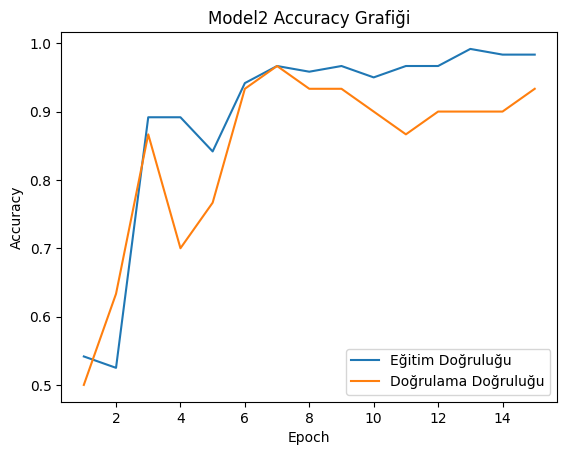

In [27]:
acc = history2.history["accuracy"]
val_acc = history2.history["val_accuracy"]

epochs_range = range(1, len(acc)+1)

plt.figure()
plt.plot(epochs_range, acc, label="Eğitim Doğruluğu")
plt.plot(epochs_range, val_acc, label="Doğrulama Doğruluğu")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model2 Accuracy Grafiği")
plt.legend()
plt.show()


Loss grafiğini çiziyoruz

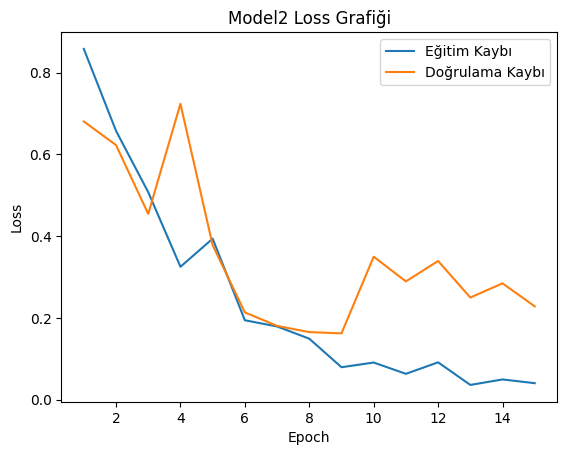

In [28]:
loss = history2.history["loss"]
val_loss = history2.history["val_loss"]

plt.figure()
plt.plot(epochs_range, loss, label="Eğitim Kaybı")
plt.plot(epochs_range, val_loss, label="Doğrulama Kaybı")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model2 Loss Grafiği")
plt.legend()
plt.show()


6 — TEST (VALIDATION) DOĞRULUĞUNU HESAPLIYORUZ

Validation seti üzerinde test ölçümü yapıyoruz

In [29]:
test_loss, test_acc = model2.evaluate(val_generator)
print("Model2 Test Doğruluğu:", test_acc)
print("Model2 Test Kaybı:", test_loss)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 944ms/step - accuracy: 0.9333 - loss: 0.2284
Model2 Test Doğruluğu: 0.9333333373069763
Model2 Test Kaybı: 0.22841326892375946
